In [ ]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')

## SVD
### Singular Value Decomposition

(-20, 20)

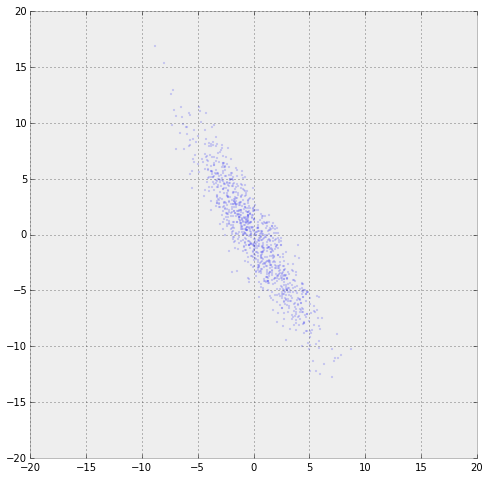

In [7]:
## An example of using SVD to determine the principal directions
## of a cloud of random points

# Two unit vectors, pointing at 30 degrees and 120 degrees
# counter-clockwise from the positive x axis:
a = np.array([
        np.sqrt(3)/2,
               1.0/2
    ])
b = np.array([
              -1.0/2,
        np.sqrt(3)/2
    ])

# Create an "elliptical" distribution of Gaussian random numbers,
# with sigma = 1 along a and sigma = 5 along b:
N = 1000
R = np.zeros((2, N))
for i in range(N):
    R[:,i] = np.random.normal(loc=0, scale=1)*a \
           + np.random.normal(loc=0, scale=5)*b
        
# Plot the cloud of points
fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111, aspect = 'equal')
plt.scatter(R[0,:], R[1,:], marker = '.', alpha = 0.2)
plt.xlim(-20, 20)
plt.ylim(-20, 20)

[ 158.9977474    31.65146287]


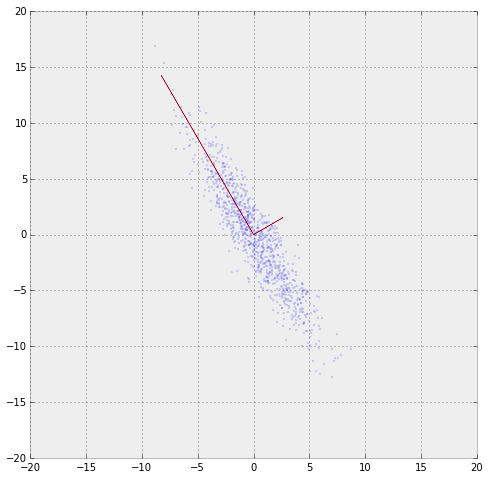

In [15]:
# Take the SVD of R
U, S, V = np.linalg.svd(R)

# Plot the point cloud
fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111, aspect = 'equal')
plt.scatter(R[0,:], R[1,:], marker = '.', alpha = 0.2)

# Plot the two left singular vectors given by U, scaled by the corresponding
# singular value.
c = 1/10
plt.arrow(0, 0, c*S[0]*U[0,0], c*S[0]*U[0,1], color = '#A60628')
plt.arrow(0, 0, c*S[1]*U[1,0], c*S[1]*U[1,1], color = '#A60628')
plt.xlim(-20, 20)
plt.ylim(-20, 20)

(-20, 20)

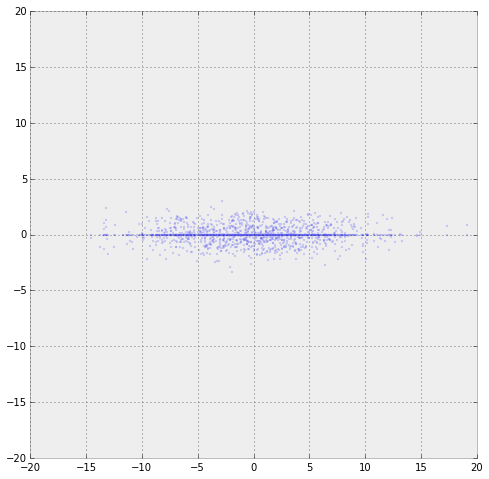

In [12]:
## Using the first left singular vector to find the angle
## between the principal direction of the cloud and the x axis,
## then rotating the cloud of points to align with the x axis.

## This is perhaps not terribly useful for points in two dimensions,
## but for a high dimensional dataset (D = 100, say), this can
## be a very convenient approach to visualisation.
## Look up the technique known as Principal Component Analysis (PCA)
## for more details.

theta = np.arctan2(U[1,0], U[0,0])
r = np.array([[ np.cos(theta),  np.sin(theta) ],
              [ np.sin(theta), -np.cos(theta) ]])

R_rot = np.zeros(R.shape)
for i in range(R.shape[1]):
    R_rot[:,i] = np.dot(r, R[:,i])

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111, aspect = 'equal')

# Plot the rotated point cloud
plt.scatter(R_rot[0,:], R_rot[1,:], marker = '.', alpha = 0.2)

# Plot the same points with y=0. The point of this is that the
# points have been rotated in such a way that most of the variation
# between the points (the principal component) is captured by the
# x coordinate. Plotting with y=0 is the same as plotting the projection
# onto the x axis. Again, this is perhaps not super-duper useful in 2D,
# but very useful for higher dimensional data.
plt.scatter(R_rot[0,:], [0]*R_rot.shape[1], marker = '.', alpha = 0.2)
plt.xlim(-20, 20)
plt.ylim(-20, 20)

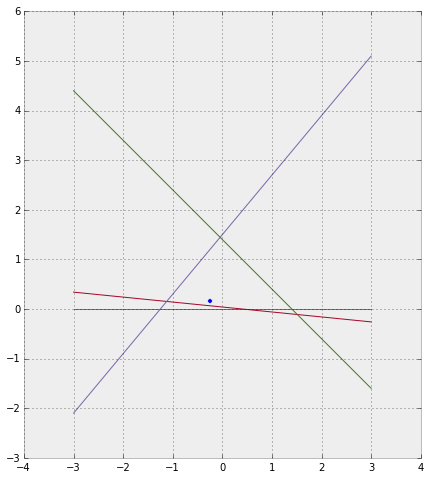

In [19]:
## An example of an equation system with four equations and 
## only two unknowns.
A = np.array([
        [0, 1],
        [0.5, 5],
        [-1.2, 1],
        [1, 1]
    ])
b = np.array([0,0.2,1.5,1.4])

# Visualise the equation system as four lines, intersecting
# in several different points. The system does not have a solution.
fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(111, aspect = 'equal')
# x0 is just to help plot the lines from x = -3 to x = 3.
x0 = np.linspace(-3, 3, 2)
for i, row in enumerate(A):
    ax.plot(x0, -x0 * row[0] / row[1] + b[i] / row[1], lw = 1)

# Calculate the pseudoinverse
Ai = np.linalg.pinv(A)
# Find an "approximate solution" by multiplying
# the right hand side with the pseudoinverse.
x  = np.dot(Ai, b)
# Plot the point found by the pseudoinverse
ax.scatter(x[0], x[1])